We changed fit_lifetime_unbined function in fit_lt_functions.py. Now it takes into account the range in Z to do the fit. Before, it didn't happen, so the maps will change after new behaviour. This NB is supposed to study how the maps will change

In [59]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.io.dst_io              import load_dst
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from invisible_cities.core.core_functions     import in_range
from invisible_cities.core.core_functions     import shift_to_bin_centers
from invisible_cities.reco.corrections_new    import read_maps
from krcal.NB_utils   .xy_maps_functions      import draw_xy_maps
from invisible_cities.reco.corrections_new    import apply_all_correction
from invisible_cities.reco.corrections_new    import norm_strategy
import invisible_cities.core.fit_functions    as fitf

In [2]:
plt.rcParams["figure.figsize"]          = 8, 7
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"

### Opening kdsts

In [3]:
files_5a = glob.glob('/analysis/6971/hdf5/prod/v0.9.9/20190111/kdst/trigger1/*')
data_6971 = load_dsts(files_5a, 'DST', 'Events')

In [4]:
files_5b = glob.glob('/analysis/7540/hdf5/prod/v1.1.0/20190801/kdst/trigger1/*')
data_7540 = load_dsts(files_5b, 'DST', 'Events')

In [5]:
files_5c = glob.glob('/analysis/7752/hdf5/prod/v1.2.0/20191122/kdst/trigger1/*')
data_7752 = load_dsts(files_5c, 'DST', 'Events')

#### Appying a quick selection

In [32]:
data_6971 = data_6971[(data_6971.nS1==1) & (data_6971.nS2==1)]
data_7540 = data_7540[(data_7540.nS1==1) & (data_7540.nS2==1)]
data_7752 = data_7752[(data_7752.nS1==1) & (data_7752.nS2==1)]

### Opening correction maps

#### Old (whithout using zrange for fitting) maps

In [6]:
maps_5a_old = read_maps('/home/ausonandres/ICAROS/krcal/map_builder/checking_zrange_maps/maps_old/map_6971_config_LBphys.h5')
maps_5b_old = read_maps('/home/ausonandres/ICAROS/krcal/map_builder/checking_zrange_maps/maps_old/map_7540_config_LBphys.h5')
maps_5c_old = read_maps('/home/ausonandres/ICAROS/krcal/map_builder/checking_zrange_maps/maps_old/map_7752_config_LBphys.h5')

#### New (using zrange for fitting) maps

In [7]:
maps_5a_new = read_maps('/home/ausonandres/ICAROS/krcal/map_builder/checking_zrange_maps/maps_new/map_6971_config_LBphys.h5')
maps_5b_new = read_maps('/home/ausonandres/ICAROS/krcal/map_builder/checking_zrange_maps/maps_new/map_7540_config_LBphys.h5')
maps_5c_new = read_maps('/home/ausonandres/ICAROS/krcal/map_builder/checking_zrange_maps/maps_new/map_7752_config_LBphys.h5')

### Comparing maps

In [8]:
import seaborn as sns

#### e0

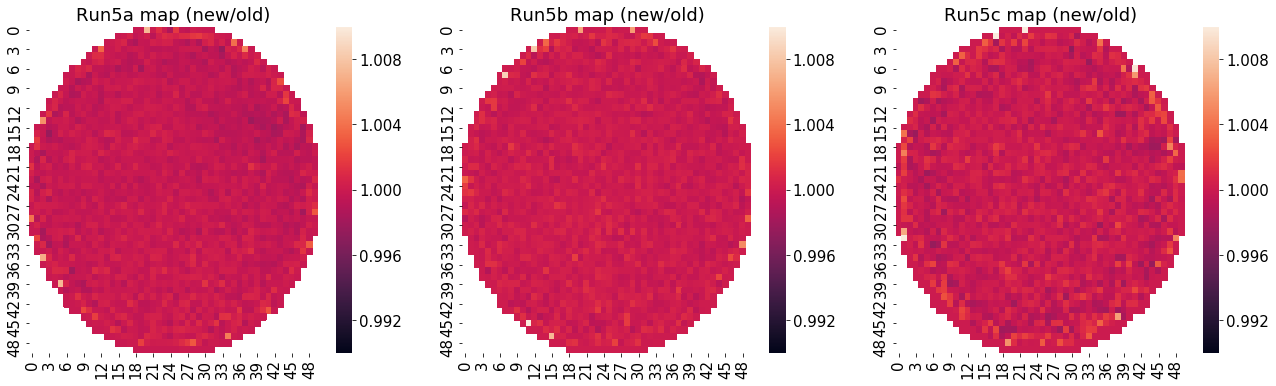

In [17]:
plt.figure(figsize=(22, 6));
plt.subplot(131)
sns.heatmap(maps_5a_new.e0.values/maps_5a_old.e0.values, vmin=0.99, vmax=1.01);
plt.title('Run5a map (new/old)');
plt.subplot(132)
sns.heatmap(maps_5b_new.e0.values/maps_5b_old.e0.values, vmin=0.99, vmax=1.01);
plt.title('Run5b map (new/old)');
plt.subplot(133)
sns.heatmap(maps_5c_new.e0.values/maps_5c_old.e0.values, vmin=0.99, vmax=1.01);
plt.title('Run5c map (new/old)');

/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ausonandres/miniconda3/envs/IC-3.7-2018-11-07/lib/python3.7/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


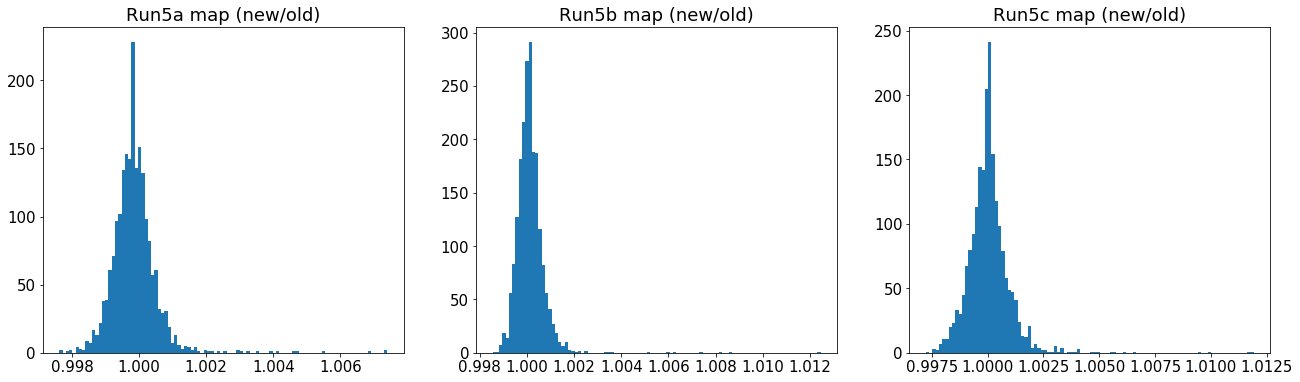

In [21]:
plt.figure(figsize=(22, 6));
plt.subplot(131)
plt.hist(maps_5a_new.e0.values.flatten()/maps_5a_old.e0.values.flatten(),100);
plt.title('Run5a map (new/old)');
plt.subplot(132)
plt.hist(maps_5b_new.e0.values.flatten()/maps_5b_old.e0.values.flatten(),100);
plt.title('Run5b map (new/old)');
plt.subplot(133)
plt.hist(maps_5c_new.e0.values.flatten()/maps_5c_old.e0.values.flatten(),100);
plt.title('Run5c map (new/old)');

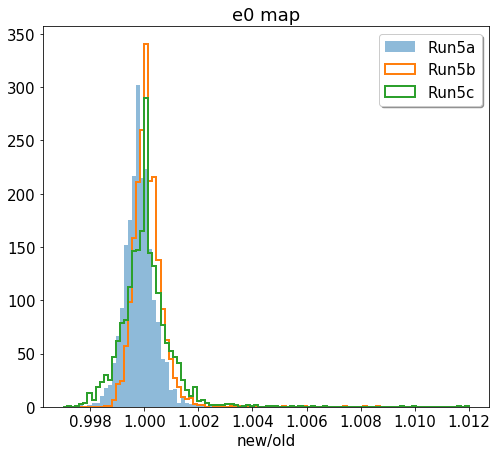

In [27]:
plt.hist(maps_5a_new.e0.values.flatten()/maps_5a_old.e0.values.flatten(),100, (0.997,1.012), label='Run5a', alpha=0.5);
plt.hist(maps_5b_new.e0.values.flatten()/maps_5b_old.e0.values.flatten(),100, (0.997,1.012), label='Run5b', histtype='step', linewidth=2);
plt.hist(maps_5c_new.e0.values.flatten()/maps_5c_old.e0.values.flatten(),100, (0.997,1.012), label='Run5c', histtype='step', linewidth=2);
plt.xlabel('new/old');
plt.title('e0 map');
plt.legend(shadow=True);

#### Lifetime

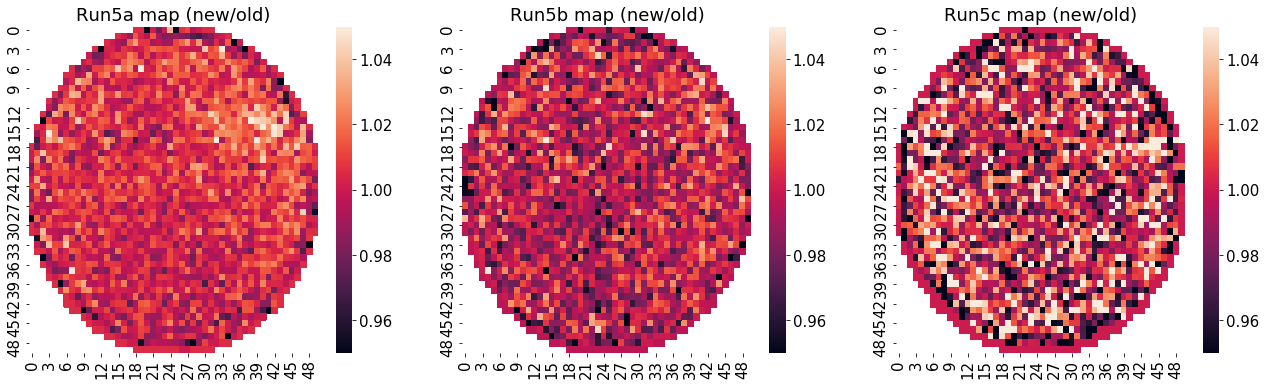

In [20]:
plt.figure(figsize=(22, 6));
plt.subplot(131)
sns.heatmap(maps_5a_new.lt.values/maps_5a_old.lt.values, vmin=0.95, vmax=1.05);
plt.title('Run5a map (new/old)');
plt.subplot(132)
sns.heatmap(maps_5b_new.lt.values/maps_5b_old.lt.values, vmin=0.95, vmax=1.05);
plt.title('Run5b map (new/old)');
plt.subplot(133)
sns.heatmap(maps_5c_new.lt.values/maps_5c_old.lt.values, vmin=0.95, vmax=1.05);
plt.title('Run5c map (new/old)');

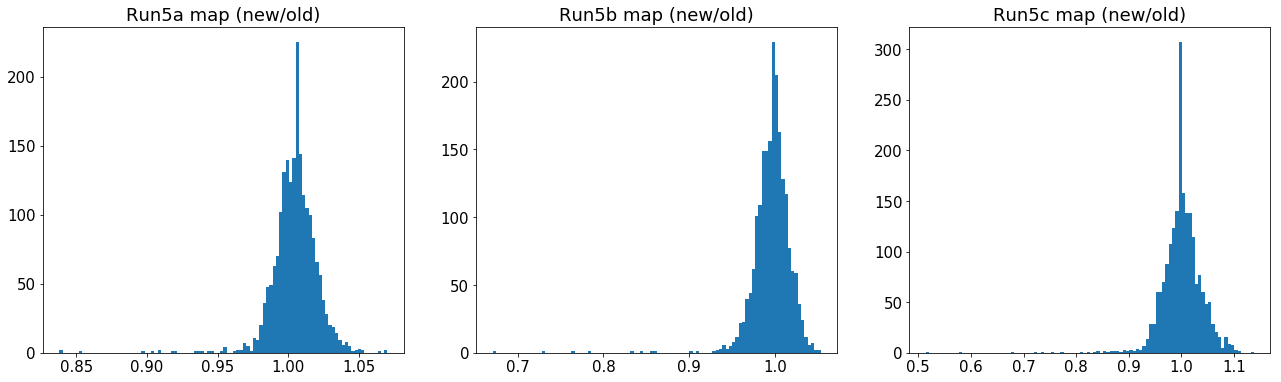

In [28]:
plt.figure(figsize=(22, 6));
plt.subplot(131)
plt.hist(maps_5a_new.lt.values.flatten()/maps_5a_old.lt.values.flatten(),100);
plt.title('Run5a map (new/old)');
plt.subplot(132)
plt.hist(maps_5b_new.lt.values.flatten()/maps_5b_old.lt.values.flatten(),100);
plt.title('Run5b map (new/old)');
plt.subplot(133)
plt.hist(maps_5c_new.lt.values.flatten()/maps_5c_old.lt.values.flatten(),100);
plt.title('Run5c map (new/old)');

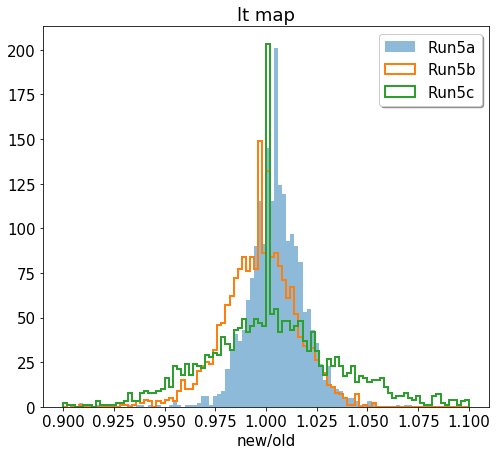

In [29]:
plt.hist(maps_5a_new.lt.values.flatten()/maps_5a_old.lt.values.flatten(),100, (0.9,1.1), label='Run5a', alpha=0.5);
plt.hist(maps_5b_new.lt.values.flatten()/maps_5b_old.lt.values.flatten(),100, (0.9,1.1), label='Run5b', histtype='step', linewidth=2);
plt.hist(maps_5c_new.lt.values.flatten()/maps_5c_old.lt.values.flatten(),100, (0.9,1.1), label='Run5c', histtype='step', linewidth=2);
plt.xlabel('new/old');
plt.title('lt map');
plt.legend(shadow=True);

## Krypton energy resolution

#### Old

In [33]:
run5a_old_corr = apply_all_correction(maps_5a_old, apply_temp=True, norm_strat=norm_strategy.kr)
run5b_old_corr = apply_all_correction(maps_5b_old, apply_temp=True, norm_strat=norm_strategy.kr)
run5c_old_corr = apply_all_correction(maps_5c_old, apply_temp=True, norm_strat=norm_strategy.kr)

In [34]:
correction_5a_old = run5a_old_corr(data_6971.X, data_6971.Y, data_6971.Z, data_6971.time)
correction_5b_old = run5b_old_corr(data_7540.X, data_7540.Y, data_7540.Z, data_7540.time)
correction_5c_old = run5c_old_corr(data_7752.X, data_7752.Y, data_7752.Z, data_7752.time)

In [35]:
data_6971['energy_old'] = data_6971.S2e*correction_5a_old
data_7540['energy_old'] = data_7540.S2e*correction_5b_old
data_7752['energy_old'] = data_7752.S2e*correction_5c_old

#### New

In [36]:
run5a_new_corr = apply_all_correction(maps_5a_new, apply_temp=True, norm_strat=norm_strategy.kr)
run5b_new_corr = apply_all_correction(maps_5b_new, apply_temp=True, norm_strat=norm_strategy.kr)
run5c_new_corr = apply_all_correction(maps_5c_new, apply_temp=True, norm_strat=norm_strategy.kr)

In [37]:
correction_5a_new = run5a_new_corr(data_6971.X, data_6971.Y, data_6971.Z, data_6971.time)
correction_5b_new = run5b_new_corr(data_7540.X, data_7540.Y, data_7540.Z, data_7540.time)
correction_5c_new = run5c_new_corr(data_7752.X, data_7752.Y, data_7752.Z, data_7752.time)

In [38]:
data_6971['energy_new'] = data_6971.S2e*correction_5a_new
data_7540['energy_new'] = data_7540.S2e*correction_5b_new
data_7752['energy_new'] = data_7752.S2e*correction_5c_new

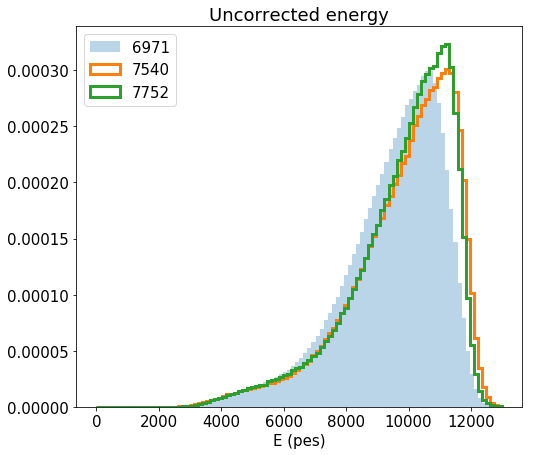

In [49]:
plt.hist(data_6971.S2e, 100, (0, 13000), alpha=0.3, label='6971', density=1);
plt.hist(data_7540.S2e, 100, (0, 13000), histtype='step', linewidth=3, label='7540', density=1);
plt.hist(data_7752.S2e, 100, (0, 13000), histtype='step', linewidth=3, label='7752', density=1);
plt.legend();
plt.xlabel('E (pes)');
plt.title('Uncorrected energy');

### Fits

In [60]:
y_6971_old, x_6971_old = np.histogram(data_6971[in_range(data_6971.energy_old, 0.038, 0.045)].energy_old, 100)
x_6971_old = shift_to_bin_centers(x_6971_old)
yerr_6971_old = np.sqrt(y_6971_old)

y_7540_old, x_7540_old = np.histogram(data_7540[in_range(data_7540.energy_old, 0.038, 0.045)].energy_old, 100)
x_7540_old = shift_to_bin_centers(x_7540_old)
yerr_7540_old = np.sqrt(y_7540_old)

y_7752_old, x_7752_old = np.histogram(data_7752[in_range(data_7752.energy_old, 0.038, 0.045)].energy_old, 100)
x_7752_old = shift_to_bin_centers(x_7752_old)
yerr_7752_old = np.sqrt(y_7752_old)

In [61]:
y_6971_new, x_6971_new = np.histogram(data_6971[in_range(data_6971.energy_new, 0.038, 0.045)].energy_new, 100)
x_6971_new = shift_to_bin_centers(x_6971_new)
yerr_6971_new = np.sqrt(y_6971_new)

y_7540_new, x_7540_new = np.histogram(data_7540[in_range(data_7540.energy_new, 0.038, 0.045)].energy_new, 100)
x_7540_new = shift_to_bin_centers(x_7540_new)
yerr_7540_new = np.sqrt(y_7540_new)

y_7752_new, x_7752_new = np.histogram(data_7752[in_range(data_7752.energy_new, 0.038, 0.045)].energy_new, 100)
x_7752_new = shift_to_bin_centers(x_7752_new)
yerr_7752_new = np.sqrt(y_7752_new)

In [63]:
f_6971_old = fitf.fit(fitf.gauss, x_6971_old, y_6971_old, seed=(100000, 0.04, 0.001), sigma=yerr_6971_old)
f_7540_old = fitf.fit(fitf.gauss, x_7540_old, y_7540_old, seed=(100000, 0.04, 0.001), sigma=yerr_7540_old)
f_7752_old = fitf.fit(fitf.gauss, x_7752_old, y_7752_old, seed=(100000, 0.04, 0.001), sigma=yerr_7752_old)

In [65]:
f_6971_new = fitf.fit(fitf.gauss, x_6971_new, y_6971_new, seed=(100000, 0.04, 0.001), sigma=yerr_6971_new)
f_7540_new = fitf.fit(fitf.gauss, x_7540_new, y_7540_new, seed=(100000, 0.04, 0.001), sigma=yerr_7540_new)
f_7752_new = fitf.fit(fitf.gauss, x_7752_new, y_7752_new, seed=(100000, 0.04, 0.001), sigma=yerr_7752_new)

In [67]:
resol_6971_old = f_6971_old[1][2]*2.35/f_6971_old[1][1]*100
resol_7540_old = f_7540_old[1][2]*2.35/f_7540_old[1][1]*100
resol_7752_old = f_7752_old[1][2]*2.35/f_7752_old[1][1]*100

In [66]:
resol_6971_new = f_6971_new[1][2]*2.35/f_6971_new[1][1]*100
resol_7540_new = f_7540_new[1][2]*2.35/f_7540_new[1][1]*100
resol_7752_new = f_7752_new[1][2]*2.35/f_7752_new[1][1]*100

In [80]:
print('|Energy resolution: (%)|')
print('|======================|')
print(f'| #Run |  Old  |  New  |')
print('|----------------------|')
print(f'| 6971 | {np.round(resol_6971_old,3)} | {np.round(resol_6971_new,3)} |')
print(f'| 7540 | {np.round(resol_7540_old,3)} | {np.round(resol_7540_new,3)} |')
print(f'| 7752 | {np.round(resol_7752_old,3)} | {np.round(resol_7752_new,3)} |')

|Energy resolution: (%)|
|======================|
| #Run |  Old  |  New  |
|----------------------|
| 6971 | 4.972 | 4.973 |
| 7540 | 4.909 | 4.904 |
| 7752 | 4.921 | 4.923 |


### Resolution vs Z

#### Run 6971

In [82]:
old_resol_vect = np.array([])
old_err_resol_vect = np.array([])
new_resol_vect = np.array([])
new_err_resol_vect = np.array([])
z_min = np.array([])
z_max = np.array([])

#z_slices = [0, 150, 300, 450, 600]
z_slices = [0, 100, 200, 300, 400, 500, 600]
for z_low, z_high in zip(z_slices[:-1],z_slices[1:]):
    z_min = np.append(z_min, z_low)
    z_max = np.append(z_max, z_high)
    
    dst = data_6971[(data_6971.Z>z_low)&(data_6971.Z<z_high)]
    
    y_old, x_old = np.histogram(dst[in_range(dst.energy_old, 0.038, 0.045)].energy_old, 100)
    x_old = shift_to_bin_centers(x_old)
    yerr_old = np.sqrt(y_old)
    y_new, x_new = np.histogram(dst[in_range(dst.energy_new, 0.038, 0.045)].energy_new, 100)
    x_new = shift_to_bin_centers(x_new)
    yerr_new = np.sqrt(y_new)
    
    f_old = fitf.fit(fitf.gauss, x_old, y_old, seed=(100000, 0.04, 0.001), sigma=yerr_old)
    f_new = fitf.fit(fitf.gauss, x_new, y_new, seed=(100000, 0.04, 0.001), sigma=yerr_new)
    
    old_resol = f_old[1][2]*2.35/f_old[1][1]*100
    old_err_resol = np.sqrt((f_old[2][2]*235/f_old[1][1])**2+(f_old[1][2]*235*f_old[2][1]/(f_old[1][1]**2))**2)
    old_resol_vect = np.append(old_resol_vect, old_resol)
    old_err_resol_vect = np.append(old_err_resol_vect, old_err_resol)
    new_resol = f_new[1][2]*2.35/f_new[1][1]*100
    new_err_resol = np.sqrt((f_new[2][2]*235/f_new[1][1])**2+(f_new[1][2]*235*f_new[2][1]/(f_new[1][1]**2))**2)
    new_resol_vect = np.append(new_resol_vect, new_resol)
    new_err_resol_vect = np.append(new_err_resol_vect, new_err_resol)

In [83]:
z_mean = (z_max+z_min)/2

In [84]:
width = np.diff(z_slices)[0]/2

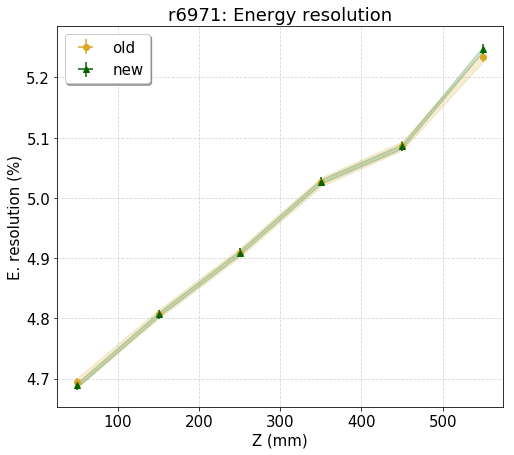

In [86]:
plt.errorbar(z_mean, old_resol_vect, yerr=old_err_resol_vect, xerr=0, fmt='.', color='goldenrod', label='old', markersize=12);
plt.fill_between(z_mean, old_resol_vect+old_err_resol_vect, old_resol_vect-old_err_resol_vect, color='goldenrod', alpha=0.2);
plt.errorbar(z_mean, new_resol_vect, yerr=new_err_resol_vect, xerr=0, fmt='^', color='darkgreen', label='new');
plt.fill_between(z_mean, new_resol_vect+new_err_resol_vect/2, new_resol_vect-new_err_resol_vect/2, color='darkgreen', alpha=0.2);
plt.legend(shadow=True);
plt.grid(True, linestyle='--', alpha=0.5);
plt.ylabel('E. resolution (%)');
plt.xlabel('Z (mm)');
plt.title('r6971: Energy resolution');

#### Run 7540

In [87]:
old_resol_vect = np.array([])
old_err_resol_vect = np.array([])
new_resol_vect = np.array([])
new_err_resol_vect = np.array([])
z_min = np.array([])
z_max = np.array([])

#z_slices = [0, 150, 300, 450, 600]
z_slices = [0, 100, 200, 300, 400, 500, 600]
for z_low, z_high in zip(z_slices[:-1],z_slices[1:]):
    z_min = np.append(z_min, z_low)
    z_max = np.append(z_max, z_high)
    
    dst = data_7540[(data_7540.Z>z_low)&(data_7540.Z<z_high)]
    
    y_old, x_old = np.histogram(dst[in_range(dst.energy_old, 0.038, 0.045)].energy_old, 100)
    x_old = shift_to_bin_centers(x_old)
    yerr_old = np.sqrt(y_old)
    y_new, x_new = np.histogram(dst[in_range(dst.energy_new, 0.038, 0.045)].energy_new, 100)
    x_new = shift_to_bin_centers(x_new)
    yerr_new = np.sqrt(y_new)
    
    f_old = fitf.fit(fitf.gauss, x_old, y_old, seed=(100000, 0.04, 0.001), sigma=yerr_old)
    f_new = fitf.fit(fitf.gauss, x_new, y_new, seed=(100000, 0.04, 0.001), sigma=yerr_new)
    
    old_resol = f_old[1][2]*2.35/f_old[1][1]*100
    old_err_resol = np.sqrt((f_old[2][2]*235/f_old[1][1])**2+(f_old[1][2]*235*f_old[2][1]/(f_old[1][1]**2))**2)
    old_resol_vect = np.append(old_resol_vect, old_resol)
    old_err_resol_vect = np.append(old_err_resol_vect, old_err_resol)
    new_resol = f_new[1][2]*2.35/f_new[1][1]*100
    new_err_resol = np.sqrt((f_new[2][2]*235/f_new[1][1])**2+(f_new[1][2]*235*f_new[2][1]/(f_new[1][1]**2))**2)
    new_resol_vect = np.append(new_resol_vect, new_resol)
    new_err_resol_vect = np.append(new_err_resol_vect, new_err_resol)

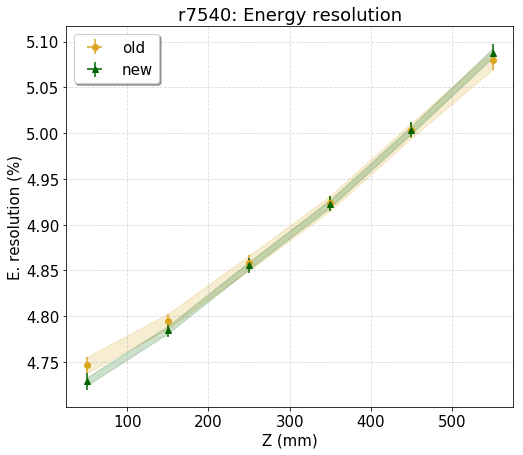

In [89]:
plt.errorbar(z_mean, old_resol_vect, yerr=old_err_resol_vect, xerr=0, fmt='.', color='goldenrod', label='old', markersize=12);
plt.fill_between(z_mean, old_resol_vect+old_err_resol_vect, old_resol_vect-old_err_resol_vect, color='goldenrod', alpha=0.2);
plt.errorbar(z_mean, new_resol_vect, yerr=new_err_resol_vect, xerr=0, fmt='^', color='darkgreen', label='new');
plt.fill_between(z_mean, new_resol_vect+new_err_resol_vect/2, new_resol_vect-new_err_resol_vect/2, color='darkgreen', alpha=0.2);
plt.legend(shadow=True);
plt.grid(True, linestyle='--', alpha=0.5);
plt.ylabel('E. resolution (%)');
plt.xlabel('Z (mm)');
plt.title('r7540: Energy resolution');

#### Run 7752

In [90]:
old_resol_vect = np.array([])
old_err_resol_vect = np.array([])
new_resol_vect = np.array([])
new_err_resol_vect = np.array([])
z_min = np.array([])
z_max = np.array([])

#z_slices = [0, 150, 300, 450, 600]
z_slices = [0, 100, 200, 300, 400, 500, 600]
for z_low, z_high in zip(z_slices[:-1],z_slices[1:]):
    z_min = np.append(z_min, z_low)
    z_max = np.append(z_max, z_high)
    
    dst = data_7752[(data_7752.Z>z_low)&(data_7752.Z<z_high)]
    
    y_old, x_old = np.histogram(dst[in_range(dst.energy_old, 0.038, 0.045)].energy_old, 100)
    x_old = shift_to_bin_centers(x_old)
    yerr_old = np.sqrt(y_old)
    y_new, x_new = np.histogram(dst[in_range(dst.energy_new, 0.038, 0.045)].energy_new, 100)
    x_new = shift_to_bin_centers(x_new)
    yerr_new = np.sqrt(y_new)
    
    f_old = fitf.fit(fitf.gauss, x_old, y_old, seed=(100000, 0.04, 0.001), sigma=yerr_old)
    f_new = fitf.fit(fitf.gauss, x_new, y_new, seed=(100000, 0.04, 0.001), sigma=yerr_new)
    
    old_resol = f_old[1][2]*2.35/f_old[1][1]*100
    old_err_resol = np.sqrt((f_old[2][2]*235/f_old[1][1])**2+(f_old[1][2]*235*f_old[2][1]/(f_old[1][1]**2))**2)
    old_resol_vect = np.append(old_resol_vect, old_resol)
    old_err_resol_vect = np.append(old_err_resol_vect, old_err_resol)
    new_resol = f_new[1][2]*2.35/f_new[1][1]*100
    new_err_resol = np.sqrt((f_new[2][2]*235/f_new[1][1])**2+(f_new[1][2]*235*f_new[2][1]/(f_new[1][1]**2))**2)
    new_resol_vect = np.append(new_resol_vect, new_resol)
    new_err_resol_vect = np.append(new_err_resol_vect, new_err_resol)

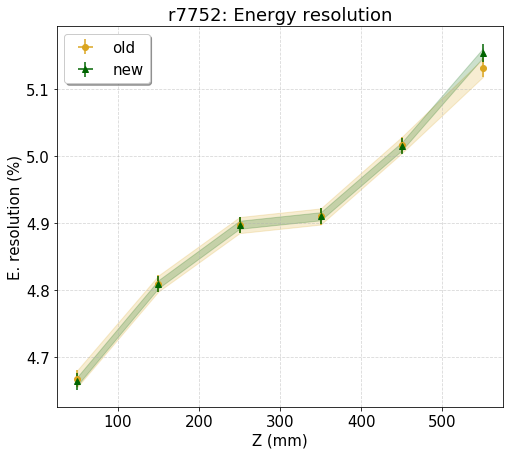

In [91]:
plt.errorbar(z_mean, old_resol_vect, yerr=old_err_resol_vect, xerr=0, fmt='.', color='goldenrod', label='old', markersize=12);
plt.fill_between(z_mean, old_resol_vect+old_err_resol_vect, old_resol_vect-old_err_resol_vect, color='goldenrod', alpha=0.2);
plt.errorbar(z_mean, new_resol_vect, yerr=new_err_resol_vect, xerr=0, fmt='^', color='darkgreen', label='new');
plt.fill_between(z_mean, new_resol_vect+new_err_resol_vect/2, new_resol_vect-new_err_resol_vect/2, color='darkgreen', alpha=0.2);
plt.legend(shadow=True);
plt.grid(True, linestyle='--', alpha=0.5);
plt.ylabel('E. resolution (%)');
plt.xlabel('Z (mm)');
plt.title('r7752: Energy resolution');